2D histogram shape: (32, 32), with 1024 values
3D histogram shape: (8, 8, 8), with 512 values


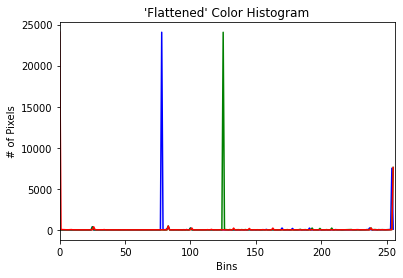

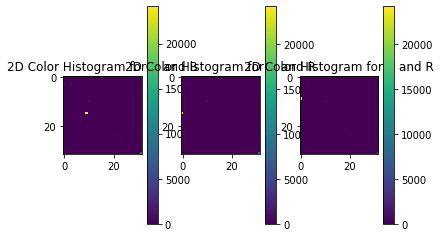

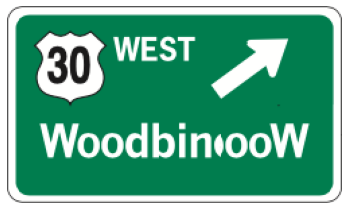

In [18]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt
  
img = cv2.imread('samples/25.png')

# https://pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/
# https://www.etutorialspoint.com/index.php/310-python-opencv-histograms-of-color-image

chans = cv2.split(img)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and plot it
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])

# create a new figure and then plot a 2D color histogram for the
# green and blue channels
fig = plt.figure()
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)
# plot a 2D color histogram for the green and red channels
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)
# plot a 2D color histogram for blue and red channels
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)
# finally, let's examine the dimensionality of one of the 2D
# histograms
print("2D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

# our 2D histogram could only take into account 2 out of the 3
# channels in the image so now let's build a 3D color histogram
# (utilizing all channels) with 8 bins in each direction -- we
# can't plot the 3D histogram, but the theory is exactly like
# that of a 2D histogram, so we'll just show the shape of the
# histogram
hist = cv2.calcHist([img], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

# display the original input image
plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(img))
# show our plots
plt.show()

# Calculate histogram without mask
# hist1 = cv2.calcHist([img],[0, 1, 2],None,[256, 256, 256],[0,256])
# hist2 = cv2.calcHist([img],[1],None,[256],[0,256])
# hist3 = cv2.calcHist([img],[2],None,[256],[0,256])

# plt.subplot(221), plt.imshow(img)
# # plt.subplot(222), plt.plot(hist1), plt.plot(hist2),plt.plot(hist3)
# plt.subplot(222), plt.plot(hist1)
# plt.xlim([0,256])

# plt.show()